# Neural Nets and Deep Learning
#### Slides:
http://bit.ly/NeuralNets_Dojo_ML

## 1. Installation Section
### 1.1 TensorFlow 

In [1]:
%%sh
pip -V

pip 9.0.1 from /opt/conda/lib/python3.6/site-packages (python 3.6)


In [4]:
%%sh
# easy_install --upgrade pip
# easy_install --upgrade six 

Searching for pip
Reading https://pypi.python.org/simple/pip/
Best match: pip 9.0.1
Processing pip-9.0.1.tar.gz
Writing /tmp/easy_install-rvf4fbdn/pip-9.0.1/setup.cfg
Running pip-9.0.1/setup.py -q bdist_egg --dist-dir /tmp/easy_install-rvf4fbdn/pip-9.0.1/egg-dist-tmp-3z2gqi1e
creating /opt/conda/lib/python3.6/site-packages/pip-9.0.1-py3.6.egg
Extracting pip-9.0.1-py3.6.egg to /opt/conda/lib/python3.6/site-packages
Adding pip 9.0.1 to easy-install.pth file
Installing pip script to /opt/conda/bin
Installing pip3 script to /opt/conda/bin
Installing pip3.6 script to /opt/conda/bin

Installed /opt/conda/lib/python3.6/site-packages/pip-9.0.1-py3.6.egg
Processing dependencies for pip
Finished processing dependencies for pip
Searching for six
Reading https://pypi.python.org/simple/six/
Best match: six 1.10.0
Processing six-1.10.0.tar.gz
Writing /tmp/easy_install-m6_8nenx/six-1.10.0/setup.cfg
Running six-1.10.0/setup.py -q bdist_egg --dist-dir /tmp/easy_install-m6_8nenx/six-1.10.0/egg-dist-tmp-

no previously-included directories found matching '.github'
no previously-included directories found matching '.travis'
no previously-included directories found matching 'docs/_build'
no previously-included directories found matching 'contrib'
no previously-included directories found matching 'tasks'
no previously-included directories found matching 'tests'
no previously-included directories found matching 'documentation/_build'
zip_safe flag not set; analyzing archive contents...
__pycache__.six.cpython-36: module references __path__


In [7]:
%%sh
pip install tensorflow

  Running setup.py bdist_wheel for markdown: started
  Running setup.py bdist_wheel for markdown: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/bf/46/10/c93e17ae86ae3b3a919c7b39dad3b5ccf09aeb066419e5c1e5
Successfully built markdown


In [8]:
#Validate your Installation
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))


b'Hello, TensorFlow!'


### 1.2 Keras

In [10]:
%%sh
pip install keras

  Running setup.py bdist_wheel for pyyaml: started
  Running setup.py bdist_wheel for pyyaml: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/2c/f7/79/13f3a12cd723892437c0cfbde1230ab4d82947ff7b3839a4fc
Successfully built pyyaml


In [ ]:
# By default, Keras will use TensorFlow as its tensor manipulation library :) 

### 1.3 scikit learn

In [41]:
%%sh
pip install sklearn

### 1.4 matplotlib

In [66]:
%%sh
pip install matplotlib

## 2. Neural Nets Examples
### 2.1 Diabetes - Pima Dataset

Dataset Description:

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268


In [1]:
seed = 10

(=>) Download the dataset from this url and save the file as "pima.csv"
http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

In [2]:
from keras.models import Sequential
from keras.layers import Dense  #Just Dense or fully connected neurons
import numpy

Using TensorFlow backend.


In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt

In [4]:
numpy.random.seed(seed)

In [5]:
def plotPerformance(history):
    # summarize history for accuracy  

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss  

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [6]:
# load pima indians dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")
dataset.shape

(768, 9)

In [7]:
print(dataset)

[[   6.     148.      72.    ...,    0.627   50.       1.   ]
 [   1.      85.      66.    ...,    0.351   31.       0.   ]
 [   8.     183.      64.    ...,    0.672   32.       1.   ]
 ..., 
 [   5.     121.      72.    ...,    0.245   30.       0.   ]
 [   1.     126.      60.    ...,    0.349   47.       1.   ]
 [   1.      93.      70.    ...,    0.315   23.       0.   ]]


In [8]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


In [31]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer="uniform", activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [32]:
# Compile model
optimizer='adam' #adam, sgd
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# Fit the model
history = model.fit(X, Y, validation_split=0.20,epochs=140, batch_size=10,  verbose=2)


Train on 614 samples, validate on 154 samples
Epoch 1/140
0s - loss: 0.6854 - acc: 0.6466 - val_loss: 0.6736 - val_acc: 0.6429
Epoch 2/140
0s - loss: 0.6662 - acc: 0.6531 - val_loss: 0.6673 - val_acc: 0.6429
Epoch 3/140
0s - loss: 0.6568 - acc: 0.6531 - val_loss: 0.6670 - val_acc: 0.6429
Epoch 4/140
0s - loss: 0.6508 - acc: 0.6547 - val_loss: 0.6632 - val_acc: 0.6494
Epoch 5/140
0s - loss: 0.6406 - acc: 0.6564 - val_loss: 0.6548 - val_acc: 0.6364
Epoch 6/140
0s - loss: 0.6274 - acc: 0.6743 - val_loss: 0.6489 - val_acc: 0.5974
Epoch 7/140
0s - loss: 0.6214 - acc: 0.6889 - val_loss: 0.6392 - val_acc: 0.6039
Epoch 8/140
0s - loss: 0.6092 - acc: 0.6857 - val_loss: 0.6304 - val_acc: 0.6494
Epoch 9/140
0s - loss: 0.6076 - acc: 0.6759 - val_loss: 0.6286 - val_acc: 0.6364
Epoch 10/140
0s - loss: 0.6019 - acc: 0.6792 - val_loss: 0.6286 - val_acc: 0.6299
Epoch 11/140
0s - loss: 0.5964 - acc: 0.6775 - val_loss: 0.6134 - val_acc: 0.6494
Epoch 12/140
0s - loss: 0.5919 - acc: 0.6857 - val_loss: 0.61

0s - loss: 0.5060 - acc: 0.7524 - val_loss: 0.5363 - val_acc: 0.7662
Epoch 104/140
0s - loss: 0.5052 - acc: 0.7573 - val_loss: 0.5484 - val_acc: 0.7403
Epoch 105/140
0s - loss: 0.5050 - acc: 0.7590 - val_loss: 0.5332 - val_acc: 0.7597
Epoch 106/140
0s - loss: 0.5045 - acc: 0.7492 - val_loss: 0.5298 - val_acc: 0.7662
Epoch 107/140
0s - loss: 0.5062 - acc: 0.7655 - val_loss: 0.5299 - val_acc: 0.7468
Epoch 108/140
0s - loss: 0.5038 - acc: 0.7508 - val_loss: 0.5440 - val_acc: 0.7338
Epoch 109/140
0s - loss: 0.5040 - acc: 0.7590 - val_loss: 0.5414 - val_acc: 0.7338
Epoch 110/140
0s - loss: 0.4981 - acc: 0.7573 - val_loss: 0.5315 - val_acc: 0.7403
Epoch 111/140
0s - loss: 0.5012 - acc: 0.7606 - val_loss: 0.5363 - val_acc: 0.7662
Epoch 112/140
0s - loss: 0.4993 - acc: 0.7492 - val_loss: 0.5320 - val_acc: 0.7403
Epoch 113/140
0s - loss: 0.4987 - acc: 0.7671 - val_loss: 0.5482 - val_acc: 0.7143
Epoch 114/140
0s - loss: 0.5147 - acc: 0.7508 - val_loss: 0.5425 - val_acc: 0.7403
Epoch 115/140
0s -

In [34]:
# evaluate the model
loss, acc_t = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], acc_t*100))

 32/768 [>.............................] - ETA: 0s
acc: 76.82%


In [35]:
# calculate predictions
probabilities = model.predict(X)
predictions = [float(round(x[0])) for x in probabilities]
accuracy = numpy.mean(predictions == Y)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))

Prediction Accuracy: 76.82%


In [36]:
 print(history.history.keys())  

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Accuracy: 65.10%


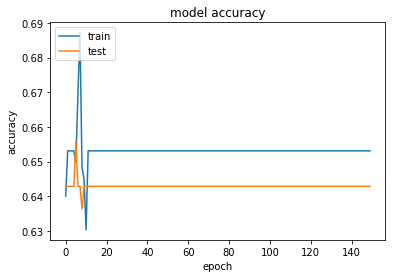

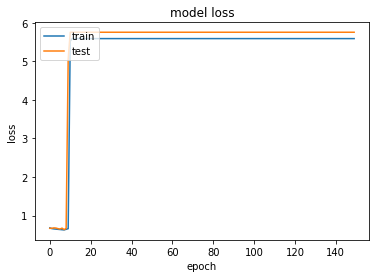

In [15]:
# Let's create a plot to evaluate the performance
print (model.optimizer)
print("Accuracy: %.2f%%" % (acc_t*100))
plotPerformance(history)

##### Let's try a new optimizer 
##### Let's play with optimization algorithms and epoch numbers! 

### 2.2 MNIST

In [39]:
from keras.layers import Dense, Activation

model.add(Dense(units=64, input_dim=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))


In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [9]:
model.fit(X, Y, nb_epoch=10, batch_size= 100,  verbose=1)

/opt/conda/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: You are passing a target array of shape (768, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils.np_utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam')
